In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
month_df = pd.read_csv('/content/drive/MyDrive/SN_m_tot_V2.0.csv', sep=';')

In [ ]:
month_df.head()

,year,month,date_frac,total_sunspots,std_dev,num_obs,def_inc
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


In [ ]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            3280 non-null   int64  
 1   month           3280 non-null   int64  
 2   date_frac       3280 non-null   float64
 3   total_sunspots  3280 non-null   float64
 4   std_dev         3280 non-null   float64
 5   num_obs         3280 non-null   int64  
 6   def_inc         3280 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 179.5 KB


In [ ]:
month_df.describe()

,year,month,date_frac,total_sunspots,std_dev,num_obs,def_inc
count,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000
mean,1885.167073,6.495122,1885.664664,81.594329,5.567896,110.492988,0.998780
std,78.916744,3.453518,78.916547,67.805438,5.220310,234.964151,0.034906
min,1749.000000,1.000000,1749.042000,0.000000,-1.000000,-1.000000,0.000000
25%,1817.000000,3.000000,1817.350250,23.900000,-1.000000,-1.000000,1.000000
50%,1885.000000,6.000000,1885.665000,66.850000,5.300000,30.000000,1.000000
75%,1953.250000,9.000000,1953.979000,122.400000,9.400000,31.000000,1.000000
max,2022.000000,12.000000,2022.286000,398.200000,23.500000,1587.000000,1.000000


In [ ]:
month_df.isnull().sum()

,0
year,0
month,0
date_frac,0
total_sunspots,0
std_dev,0
num_obs,0
def_inc,0


In [ ]:
month_df.duplicated().sum()

0

In [ ]:
month_df.corr()

,year,month,date_frac,total_sunspots,std_dev,num_obs,def_inc
year,1.000000,-0.002450,0.999993,0.031088,0.388655,0.617441,-0.060596
month,-0.002450,1.000000,0.001202,0.011714,0.004893,-0.003043,0.040429
date_frac,0.999993,0.001202,1.000000,0.031131,0.388674,0.617430,-0.060448
total_sunspots,0.031088,0.011714,0.031131,1.000000,0.518154,-0.079152,0.006453
std_dev,0.388655,0.004893,0.388674,0.518154,1.000000,0.047344,-0.054944
num_obs,0.617441,-0.003043,0.617430,-0.079152,0.047344,1.000000,-0.153313
def_inc,-0.060596,0.040429,-0.060448,0.006453,-0.054944,-0.153313,1.000000


In [ ]:
time_cols = ['year', 'month']
time_col = None

for col in time_cols:
    if col in month_df.columns:
        time_col = col
        break
if time_col is not None:
  print(f'Time column identified as: {time_col}')
  # Further processing based on time_col, e.g.
  # Convert the time column to datetime objects if not already
  if not pd.api.types.is_datetime64_any_dtype(month_df[time_col]):
      try:
          month_df[time_col] = pd.to_datetime(month_df[time_col])
      except ValueError:
          print("Could not convert to datetime automatically. Please check the format of the time column.")
else:
    print("Time column not identified. Please check the dataframe columns.")

Time column identified as: year


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomusou_v/hgbpmyx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomusou_v/ie2i8gqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38024', 'data', 'file=/tmp/tmpomusou_v/hgbpmyx0.json', 'init=/tmp/tmpomusou_v/ie2i8gqk.json', 'output', 'file=/tmp/tmpomusou_v/prophet_model678zi4u8/prophet_model-20241127032724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:27:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:27:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediction for 50 months into the future:
             ds      yhat
3350 2028-03-01  5.310224
3351 2028-04-01  5.311049
3352 2028-05-01  5.262939
3353 2028-06-01  5.237826
3354 2028-07-01  5.290028
3355 2028-08-01  5.337366
3356 2028-09-01  5.268597
3357 2028-10-01  5.352353
3358 2028-11-01  5.264573
3359 2028-12-01  5.314031
3360 2029-01-01  5.151680
3361 2029-02-01  5.310817
3362 2029-03-01  5.283387
3363 2029-04-01  5.295200
3364 2029-05-01  5.235882
3365 2029-06-01  5.208600
3366 2029-07-01  5.269814
3367 2029-08-01  5.311109
3368 2029-09-01  5.239596
3369 2029-10-01  5.321546
3370 2029-11-01  5.255797
3371 2029-12-01  5.289785
3372 2030-01-01  5.115410
3373 2030-02-01  5.287020
3374 2030-03-01  5.256689
3375 2030-04-01  5.279337
3376 2030-05-01  5.208672
3377 2030-06-01  5.179431
3378 2030-07-01  5.249601
3379 2030-08-01  5.284721
3380 2030-09-01  5.210613
3381 2030-10-01  5.290996
3382 2030-11-01  5.247105
3383 2030-12-01  5.265147
3384 2031-01-01  5.079140
3385 2031-02-01  5.26

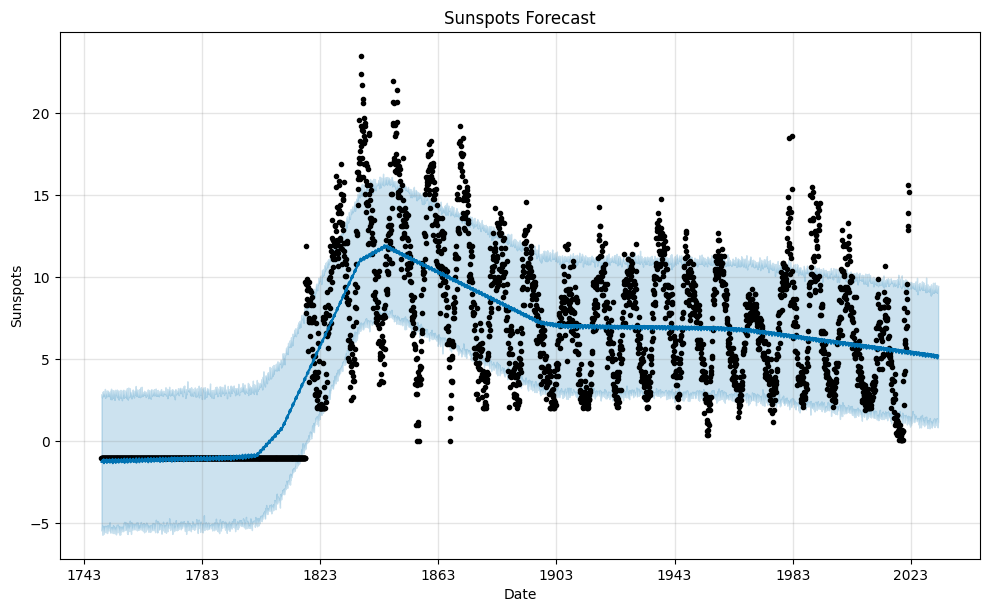

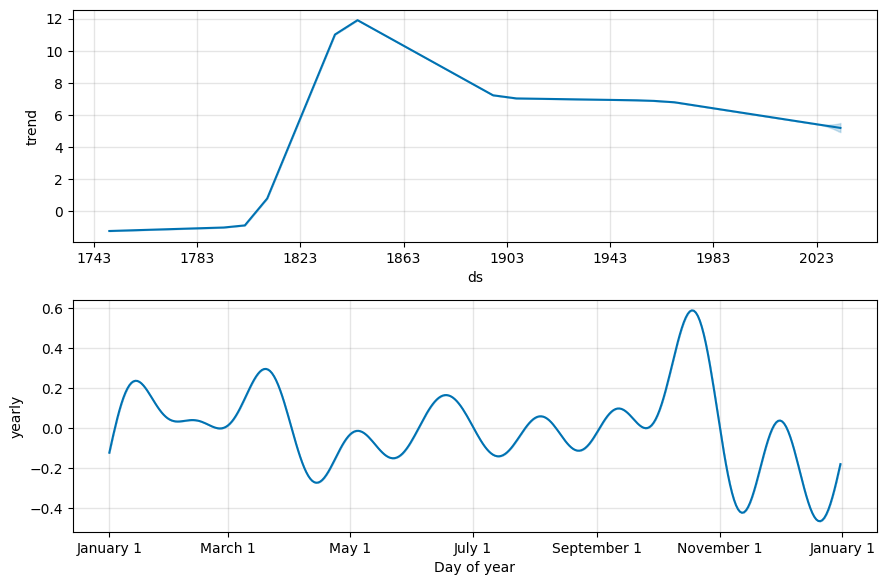

In [ ]:
!pip install prophet

from prophet import Prophet


# Prepare the data for Prophet
df_prophet = month_df[['year', 'month', 'total_sunspots']]
df_prophet = df_prophet.rename(columns={'year':'year', 'month':'month', 'total_sunspots':'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet[['year', 'month']].assign(day=1))
df_prophet = df_prophet[['ds', 'y']]

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Reduce the prediction period
future = model.make_future_dataframe(periods=120, freq='MS') # Predicting for 120 months instead of 365

# Predict sunspots
forecast = model.predict(future)

# Print predictions for the specified future time periods
# Adjusting future periods for the reduced prediction horizon
future_periods = [50, 100, 120]
for period in future_periods:
  print(f"\nPrediction for {period} months into the future:")
  print(forecast[['ds', 'yhat']].tail(period))


# Plotting the forecast
fig1 = model.plot(forecast)
plt.title("Sunspots Forecast")
plt.xlabel("Date")
plt.ylabel("Sunspots")
plt.show()


# Plotting the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
# Predict sunspots for 1, 6, and 9 months into the future
future_periods = [1, 6, 9]  # Months into the future
last_date = df_prophet['ds'].max()

for months in future_periods:
    future_date = last_date + pd.DateOffset(months=months)
    future_df = pd.DataFrame({'ds': [future_date]})
    prediction = model.predict(future_df)
    print(f"\nPrediction for {months} months into the future ({future_date.strftime('%Y-%m-%d')}):")
    print(f"Sunspots: {prediction['yhat'].iloc[0]}")


Prediction for 1 months into the future (2022-05-01):
Sunspots: 5.407345014653264

Prediction for 6 months into the future (2022-10-01):
Sunspots: 5.4896695869900585

Prediction for 9 months into the future (2023-01-01):
Sunspots: 5.277813396290608


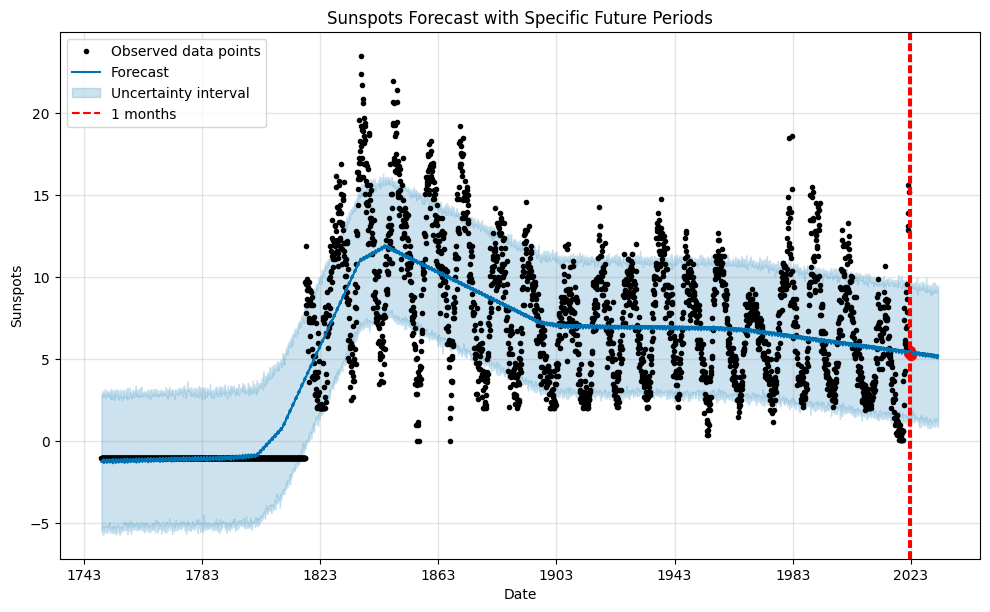

In [ ]:
# Plotting the forecast for specific future periods
fig3 = model.plot(forecast)
plt.title("Sunspots Forecast with Specific Future Periods")
plt.xlabel("Date")
plt.ylabel("Sunspots")

# Highlight the specific future predictions
for months in future_periods:
    future_date = last_date + pd.DateOffset(months=months)
    plt.axvline(x=future_date, color='red', linestyle='--', label=f'{months} months' if months == future_periods[0] else '')
    prediction = model.predict(pd.DataFrame({'ds': [future_date]}))
    plt.scatter(future_date, prediction['yhat'].iloc[0], color='red', s=50)

plt.legend() # Show the legend for the highlighted points
plt.show()


Prediction for 1 years into the future (2023-04-01):
Sunspots: 5.46212207819044

Prediction for 10 years into the future (2032-04-01):
Sunspots: 5.211712417877343

OverflowError encountered when predicting 20 years into the future.
Consider reducing the prediction horizon or adjusting the dataset's time range.


OverflowError: Overflow in int64 addition

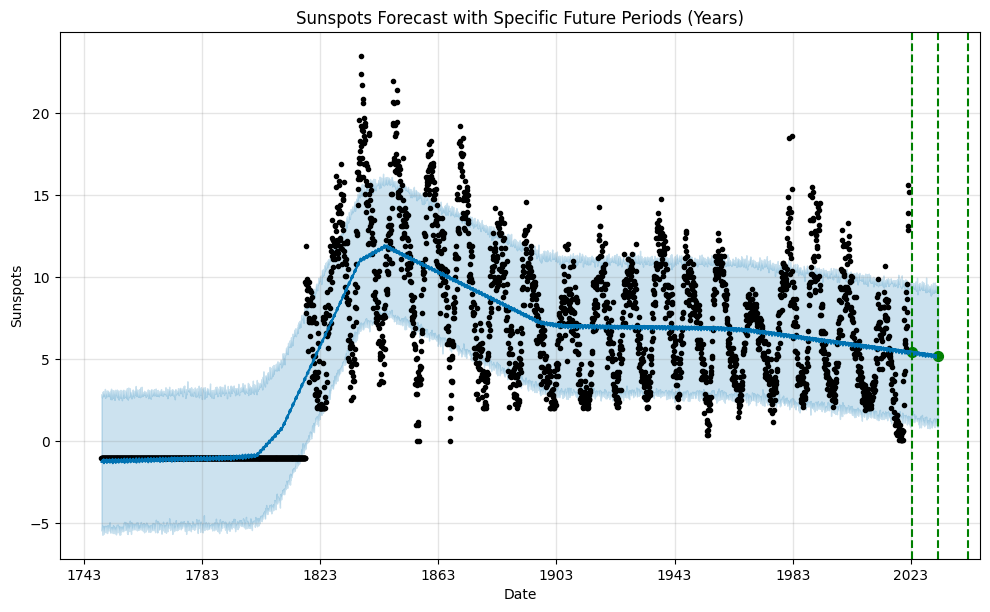

In [ ]:
# Predict sunspots for 1, 10, and 20 years into the future
future_periods_years = [1, 10, 20]  # Years into the future
last_date = df_prophet['ds'].max()

for years in future_periods_years:
    # Instead of using pd.DateOffset, directly add years to the year component
    future_year = last_date.year + years
    future_date = pd.to_datetime(f"{future_year}-{last_date.month}-{last_date.day}")
    future_df = pd.DataFrame({'ds': [future_date]})

    # Try to handle the OverflowError by catching it and adjusting the prediction range
    try:
        prediction = model.predict(future_df)
        print(f"\nPrediction for {years} years into the future ({future_date.strftime('%Y-%m-%d')}):")
        print(f"Sunspots: {prediction['yhat'].iloc[0]}")
    except OverflowError:
        print(f"\nOverflowError encountered when predicting {years} years into the future.")
        print("Consider reducing the prediction horizon or adjusting the dataset's time range.")

# Plotting the forecast for specific future periods (in years)
fig4 = model.plot(forecast)
plt.title("Sunspots Forecast with Specific Future Periods (Years)")
plt.xlabel("Date")
plt.ylabel("Sunspots")

# Highlight the specific future predictions (in years)
for years in future_periods_years:
    # Instead of using pd.DateOffset, directly add years to the year component
    future_year = last_date.year + years
    future_date = pd.to_datetime(f"{future_year}-{last_date.month}-{last_date.day}")
    plt.axvline(x=future_date, color='green', linestyle='--', label=f'{years} years' if years == future_periods_years[0] else '')
    prediction = model.predict(pd.DataFrame({'ds': [future_date]}))
    plt.scatter(future_date, prediction['yhat'].iloc[0], color='green', s=50)

plt.legend()  # Show the legend for the highlighted points
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Prepare the data for Prophet
df_prophet = month_df[['year', 'month', 'total_sunspots']]
df_prophet = df_prophet.rename(columns={'year':'year', 'month':'month', 'total_sunspots':'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet[['year', 'month']].assign(day=1))
df_prophet = df_prophet[['ds', 'y']]

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Reduce the prediction period
future = model.make_future_dataframe(periods=120, freq='MS') # Predicting for 120 months instead of 365

# Predict sunspots
forecast = model.predict(future)

# Print predictions for the specified future time periods
# Adjusting future periods for the reduced prediction horizon
future_periods = [50, 100, 120]
for period in future_periods:
  print(f"\nPrediction for {period} months into the future:")
  print(forecast[['ds', 'yhat']].tail(period))

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mape, r2

# Predictions for different time horizons (days)
future_days = [100, 200, 365]
for days in future_days:
  future_date = df_prophet['ds'].max() + pd.DateOffset(days=days)
  future_df = pd.DataFrame({'ds': [future_date]})
  prediction = model.predict(future_df)
  print(f"\nPrediction for {days} days into the future:")
  print(f"Sunspots: {prediction['yhat'].iloc[0]}")

# Forecasting growth options
growth_options = ['logistic', 'linear']
for growth in growth_options:
    model_growth = Prophet(growth=growth)
    model_growth.fit(df_prophet)
    future_growth = model_growth.make_future_dataframe(periods=365, freq='D')
    forecast_growth = model_growth.predict(future_growth)

    # Evaluate the model
    y_true = df_prophet['y'].values
    y_pred = forecast_growth['yhat'][:len(y_true)].values
    mae, mape, r2 = evaluate_model(y_true, y_pred)
    print(f"\nGrowth: {growth}")
    print(f"MAE: {mae}, MAPE: {mape}, R2: {r2}")

# Seasonality testing
periods = [30, 90, 365]
fourier_orders = [3, 5, 7]
for period in periods:
    for order in fourier_orders:
        model_seasonal = Prophet()
        model_seasonal.add_seasonality(name='custom_seasonality', period=period, fourier_order=order)
        model_seasonal.fit(df_prophet)
        future_seasonal = model_seasonal.make_future_dataframe(periods=365, freq='D')
        forecast_seasonal = model_seasonal.predict(future_seasonal)

        y_true = df_prophet['y'].values
        y_pred = forecast_seasonal['yhat'][:len(y_true)].values
        mae, mape, r2 = evaluate_model(y_true, y_pred)

        print(f"\nSeasonality - Period: {period}, Order: {order}")
        print(f"MAE: {mae}, MAPE: {mape}, R2: {r2}")


# Trend changepoints tuning
n_changepoints = [10, 20, 30]
changepoint_prior_scales = [0.01, 0.1, 0.5]
for n_cp in n_changepoints:
  for cp_scale in changepoint_prior_scales:
    model_changepoint = Prophet(n_changepoints=n_cp, changepoint_prior_scale=cp_scale)
    model_changepoint.fit(df_prophet)
    future_changepoint = model_changepoint.make_future_dataframe(periods=365, freq='D')
    forecast_changepoint = model_changepoint.predict(future_changepoint)

    y_true = df_prophet['y'].values
    y_pred = forecast_changepoint['yhat'][:len(y_true)].values
    mae, mape, r2 = evaluate_model(y_true, y_pred)

    print(f"\nChangepoints - n_changepoints: {n_cp}, changepoint_prior_scale: {cp_scale}")
    print(f"MAE: {mae}, MAPE: {mape}, R2: {r2}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomusou_v/ub260nsf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomusou_v/t5vn4iv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92968', 'data', 'file=/tmp/tmpomusou_v/ub260nsf.json', 'init=/tmp/tmpomusou_v/t5vn4iv0.json', 'output', 'file=/tmp/tmpomusou_v/prophet_modeliif4jj3g/prophet_model-20241127032746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediction for 50 months into the future:
             ds      yhat
3350 2028-03-01  5.310224
3351 2028-04-01  5.311049
3352 2028-05-01  5.262939
3353 2028-06-01  5.237826
3354 2028-07-01  5.290028
3355 2028-08-01  5.337366
3356 2028-09-01  5.268597
3357 2028-10-01  5.352353
3358 2028-11-01  5.264573
3359 2028-12-01  5.314031
3360 2029-01-01  5.151680
3361 2029-02-01  5.310817
3362 2029-03-01  5.283387
3363 2029-04-01  5.295200
3364 2029-05-01  5.235882
3365 2029-06-01  5.208600
3366 2029-07-01  5.269814
3367 2029-08-01  5.311109
3368 2029-09-01  5.239596
3369 2029-10-01  5.321546
3370 2029-11-01  5.255797
3371 2029-12-01  5.289785
3372 2030-01-01  5.115410
3373 2030-02-01  5.287020
3374 2030-03-01  5.256689
3375 2030-04-01  5.279337
3376 2030-05-01  5.208672
3377 2030-06-01  5.179431
3378 2030-07-01  5.249601
3379 2030-08-01  5.284721
3380 2030-09-01  5.210613
3381 2030-10-01  5.290996
3382 2030-11-01  5.247105
3383 2030-12-01  5.265147
3384 2031-01-01  5.079140
3385 2031-02-01  5.26

ValueError: Capacities must be supplied for logistic growth in column "cap"

In [ ]:
future_periods = [1, 6, 9]  # Months into the future
last_date = df_prophet['ds'].max()

for months in future_periods:
    future_date = last_date + pd.DateOffset(months=months)
    future_df = pd.DataFrame({'ds': [future_date]})
    prediction = model.predict(future_df)
    print(f"\nPrediction for {months} months into the future ({future_date.strftime('%Y-%m-%d')}):")
    print(f"Sunspots: {prediction['yhat'].iloc[0]}")

# Function to evaluate the model (already defined in your code)
# ...

# Forecasting growth options
growth_options = ['logistic', 'linear']
for growth in growth_options:
    model_growth = Prophet(growth=growth)

    if growth == 'logistic':
        # Assuming 'y' is your target column
        df_prophet['cap'] = df_prophet['y'].max()
    model_growth.fit(df_prophet)
    future_growth = model_growth.make_future_dataframe(periods=12, freq='MS') # Predicting for 12 months
    forecast_growth = model_growth.predict(future_growth)

    # Evaluate the model
    y_true = df_prophet['y'].values
    y_pred = forecast_growth['yhat'][:len(y_true)].values
    mae, mape, r2 = evaluate_model(y_true, y_pred)
    print(f"\nGrowth: {growth}")
    print(f"MAE: {mae}, MAPE: {mape}, R2: {r2}")

    #Plot for Growth
    fig_growth = model_growth.plot(forecast_growth)
    plt.title(f"Sunspots Forecast with {growth} growth")
    plt.show()


# Seasonality testing
periods = [12]  # Yearly seasonality
fourier_orders = [3, 5, 7]
for period in periods:
    for order in fourier_orders:
        model_seasonal = Prophet()
        model_seasonal.add_seasonality(name='yearly', period=period, fourier_order=order) # Use yearly seasonality
        model_seasonal.fit(df_prophet)
        future_seasonal = model_seasonal.make_future_dataframe(periods=12, freq='MS')  # Predicting for 12 months
        forecast_seasonal = model_seasonal.predict(future_seasonal)

        y_true = df_prophet['y'].values
        y_pred = forecast_seasonal['yhat'][:len(y_true)].values
        mae, mape, r2 = evaluate_model(y_true, y_pred)

        print(f"\nSeasonality - Period: {period}, Order: {order}")
        print(f"MAE: {mae}, MAPE: {mape}, R2: {r2}")

        # Plot for Seasonality
        fig_seasonal = model_seasonal.plot(forecast_seasonal)
        plt.title(f"Sunspots Forecast with seasonality (period={period}, order={order})")
        plt.show()


# Trend changepoints tuning
n_changepoints = [10, 25, 50] # Reduced number of changepoints for faster computation
changepoint_prior_scales = [0.01, 0.1, 0.5]
for n_cp in n_changepoints:
    for cp_scale in changepoint_prior_scales:
        model_changepoint = Prophet(n_changepoints=n_cp, changepoint_prior_scale=cp_scale)
        model_changepoint.fit(df_prophet)
        future_changepoint = model_changepoint.make_future_dataframe(periods=12, freq='MS')  # Predicting for 12 months
        forecast_changepoint = model_changepoint.predict(future_changepoint)

        y_true = df_prophet['y'].values
        y_pred = forecast_changepoint['yhat'][:len(y_true)].values
        mae, mape, r2 = evaluate_model(y_true, y_pred)

        print(f"\nChangepoints - n_changepoints: {n_cp}, changepoint_prior_scale: {cp_scale}")
        print(f"MAE: {mae}, MAPE: {mape}, R2: {r2}")

        # Plot for Changepoints
        fig_changepoint = model_changepoint.plot(forecast_changepoint)
        plt.title(f"Sunspots Forecast with changepoints (n_changepoints={n_cp}, changepoint_prior_scale={cp_scale})")
        plt.show()


Prediction for 1 months into the future (2022-05-01):
Sunspots: 5.407345014653264

Prediction for 6 months into the future (2022-10-01):
Sunspots: 5.4896695869900585


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpomusou_v/qb17ur4u.json



Prediction for 9 months into the future (2023-01-01):
Sunspots: 5.277813396290608


DEBUG:cmdstanpy:input tempfile: /tmp/tmpomusou_v/hf8flv1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94485', 'data', 'file=/tmp/tmpomusou_v/qb17ur4u.json', 'init=/tmp/tmpomusou_v/hf8flv1r.json', 'output', 'file=/tmp/tmpomusou_v/prophet_modela7qufzvq/prophet_model-20241127032801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:28:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ValueError: Capacities must be supplied for logistic growth in column "cap"

In [ ]:
future_periods_years = [1, 10, 20]
last_date = df_prophet['ds'].max()

for years in future_periods_years:
    future_date = pd.to_datetime(
        last_date.strftime('%Y-%m-%d').replace(
            str(last_date.year), str(last_date.year + years)
        )
    )
    future_df = pd.DataFrame({'ds': [future_date]})
    prediction = model.predict(future_df)
    print(f"\nPrediction for {years} years into the future ({future_date.strftime('%Y-%m-%d')})")
    print(f"Sunspots: {prediction['yhat'].iloc[0]: .5f}")

# Plotting the forecast for specific future periods (in years)
fig4 = model.plot(forecast)
plt.title("Sunspots Forecast with Specific Future Periods (Years)")
plt.xlabel("Date")
plt.ylabel("Sunspots")

# Highlightting the specific future predictions (in years)
for years in future_periods_years:
    future_date = last_date + pd.DateOffset(years=years)
    plt.axvline(x=future_date, color='green', linestyle='--', label=f'{years} years' if years == future_periods_years[0] else '')
    prediction = model.predict(pd.DataFrame({'ds': [future_date]}))
    plt.scatter(future_date, prediction['yhat'].iloc[0], color='green', s=50)

plt.legend()  # Show the legend for the highlighted points
plt.show()


Prediction for 1 years into the future (2023-04-01)
Sunspots:  5.46212

Prediction for 10 years into the future (2032-04-01)
Sunspots:  5.21171


OverflowError: Overflow in int64 addition